# 연속시간신호 x(t)를 x(n)으로 샘플링 후 다시 x(t)로 복원하기

## import Library

In [8]:
# import Library
import numpy as np
import matplotlib.pylab as plt   # pyplot이 아닌 pylab을 사용했음에 주목, 차이 분명히 하기 

## 신호 정의

In [9]:
# x(n) 신호 정의
fs = 5000; Ts = 0.0002          # 샘플링주파수(fs),  샘플링주기(Ts) [fs = 5000 = 1/Ts, Ts = 1/5000 = 0.0002]
n = np.arange(-25,26)           # 인데스 어레이,                    [-25 <= n <= 25]
xn = np.exp(-1000*abs(n*Ts))    # 샘플신호(이산신호)
N=len(n)

In [10]:
# x(t) 신호 정의 
dt = 0.00005                     # 시간 간격
t = np.arange(-0.005, 0.005, dt) # sinc 함수 시간축
Nt = len(t)                      # sinc 함수 시간축 길이

In [11]:
# 복원(x(n)->x(t))
sinc_out = np.zeros(Nt)    # 복원결과 출력배열
for i in range(Nt):
    sum = 0
    for j in range(N):     # 각각의 n 위치마다, 싱크함수와 곱의 합을 구한다.
        sum = sum + xn[j]*np.sinc(fs*(i*dt - j*Ts))
    sinc_out[i] = sum      # 각각의 n 위치마다 출력배열에 저장한다. 

## 그래프로 나타내기

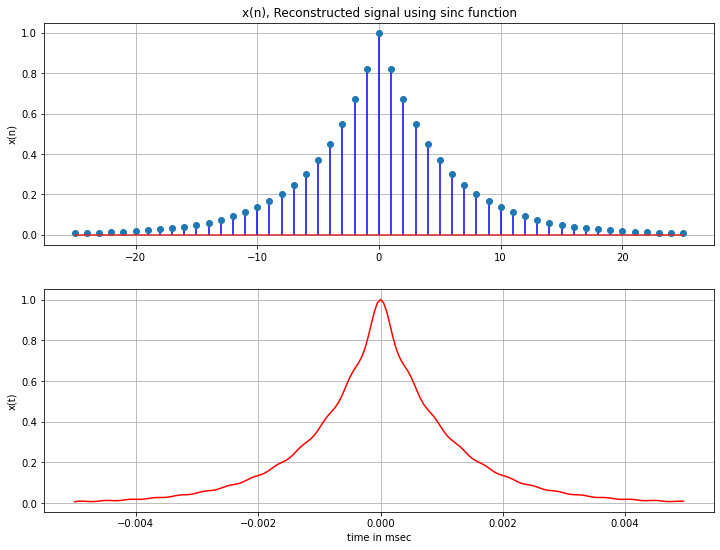

In [18]:
# 그래프 나타내기 
# x(n)
plt.figure(figsize=(12,9))
plt.subplot(2,1,1); plt.stem(n,xn,"blue"); plt.ylabel("x(n)"); plt.grid()
plt.title("x(n), Reconstructed signal using sinc function")

# 복원된 x(t)
plt.subplot(2,1,2); plt.plot(t,sinc_out,"red")
plt.xlabel("time in msec"); plt.ylabel("x(t)"); plt.grid()